# Imports

In [93]:
import os
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tabularnn import dataprep
from tabularnn import train

import importlib

importlib.reload(dataprep)
importlib.reload(train)

<module 'tabularnn.train' from 'c:\\Users\\Joel Nic\\Documents\\college\\courses\\fall 2024\\ICS-661\\nn_for_tablular_data\\tabularnn\\train.py'>

# Load Training Data

In [74]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'))
X_train = train_df.iloc[:, 1:].values  # features 
y_train = train_df.iloc[:, 0].values   # first column is labels

# input/output dim
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = 10

In [75]:
dataset = dataprep.TabularDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [76]:
model = nn.Sequential(
    nn.Linear(INPUT_SIZE, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, OUTPUT_SIZE)
)

Epoch [1/10], Loss: 0.0099, F1 Score: 0.997, Accuracy: 0.997, AUROC: 1.000
Epoch [2/10], Loss: 0.0066, F1 Score: 0.998, Accuracy: 0.998, AUROC: 1.000
Epoch [3/10], Loss: 0.0090, F1 Score: 0.997, Accuracy: 0.997, AUROC: 1.000
Epoch [4/10], Loss: 0.0067, F1 Score: 0.998, Accuracy: 0.998, AUROC: 1.000
Epoch [5/10], Loss: 0.0085, F1 Score: 0.997, Accuracy: 0.997, AUROC: 1.000
Epoch [6/10], Loss: 0.0074, F1 Score: 0.998, Accuracy: 0.998, AUROC: 1.000
Epoch [7/10], Loss: 0.0073, F1 Score: 0.998, Accuracy: 0.998, AUROC: 1.000
Epoch [8/10], Loss: 0.0083, F1 Score: 0.997, Accuracy: 0.997, AUROC: 1.000
Epoch [9/10], Loss: 0.0063, F1 Score: 0.998, Accuracy: 0.998, AUROC: 1.000
Epoch [10/10], Loss: 0.0084, F1 Score: 0.997, Accuracy: 0.997, AUROC: 1.000


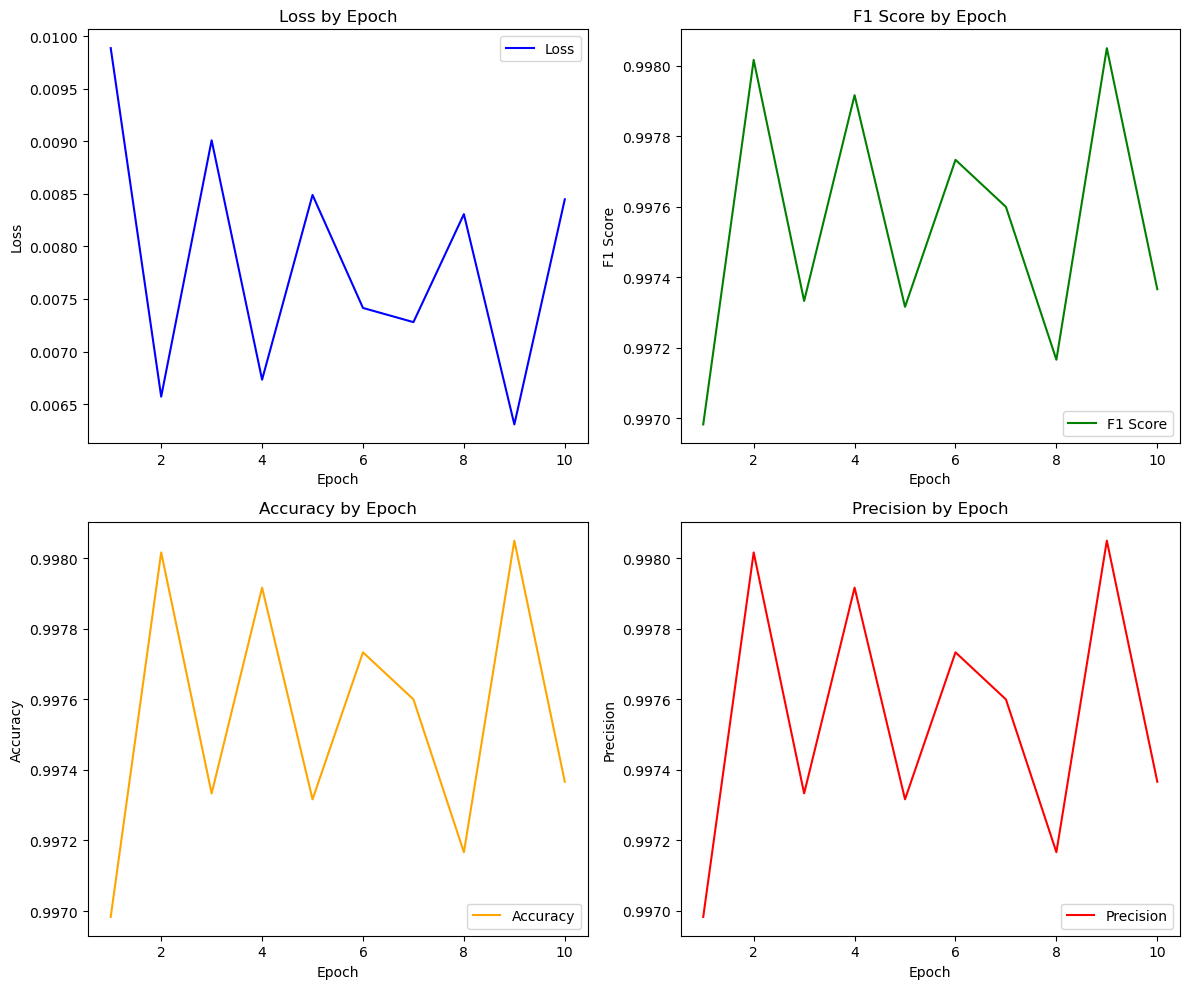

In [90]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model, loss, f1, acc, precision, auc = train.train_model(model, dataloader, criterion=criterion, optimizer = optimizer, num_epochs=10)
train.plot_metrics(loss, f1, acc, precision, auc)

# Evaluate on Test Set

In [94]:
test_df = pd.read_csv(os.path.join('data', 'test.csv'))
X_test = test_df.iloc[:, 1:].values  # features
y_test = test_df.iloc[:, 0].values   # first column is labels

In [95]:
test_dataset = dataprep.TabularDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [96]:
average_loss, f1, accuracy, precision, auroc = train.evaluate(model, test_dataloader, criterion=criterion)

Loss: 0.1925, f1: 0.975, accuracy: 0.9748, percision: 0.9749, auroc: 0.9994
